# Online Shoppers Purchasing Intention
- The dataset consists of feature vectors belonging to 12,330 sessions. 
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period. 

- NOTE: Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping. (From UCI Machine Learning)

### Importing Packages

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


### Loading Dataset

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

### Dataset overview

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Information about attributre

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Describing Dataset

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Checking for N-Unique values for object columns

In [6]:
df_categorical = df.select_dtypes(['object'])
df_categorical.nunique()
print(df_categorical.value_counts())

Month  VisitorType      
May    Returning_Visitor    3045
Nov    Returning_Visitor    2557
Mar    Returning_Visitor    1675
Dec    Returning_Visitor    1330
Oct    Returning_Visitor     425
Nov    New_Visitor           419
Jul    Returning_Visitor     378
Aug    Returning_Visitor     361
Sep    Returning_Visitor     340
Dec    New_Visitor           335
May    New_Visitor           319
June   Returning_Visitor     257
Mar    New_Visitor           232
Feb    Returning_Visitor     183
Oct    New_Visitor           124
Sep    New_Visitor           108
Aug    New_Visitor            72
Dec    Other                  62
Jul    New_Visitor            54
June   New_Visitor            30
Nov    Other                  22
June   Other                   1
Feb    New_Visitor             1
dtype: int64


## Data Preprocessing
- Performing encoding on attributes
- Removing outliers
- Checking for the correlations
- Standardization of data

### Encoding object attributes

In [7]:
ordinal_encoder = OrdinalEncoder()
df_encoded = ordinal_encoder.fit_transform(df)
df_encoded = pd.DataFrame(df_encoded,columns=df.columns)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  float64
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  float64
 11  OperatingSystems         12330 non-null  float64
 12  Browser                  12330 non-null  float64
 13  Region                   12330 non-null  float64
 14  TrafficType           

### Checking for an outliers
- In a boxplot consideration, pagevalues, information_duration, Administrative_duration has high volume of outliers. We would try to remove them by using IQR method.

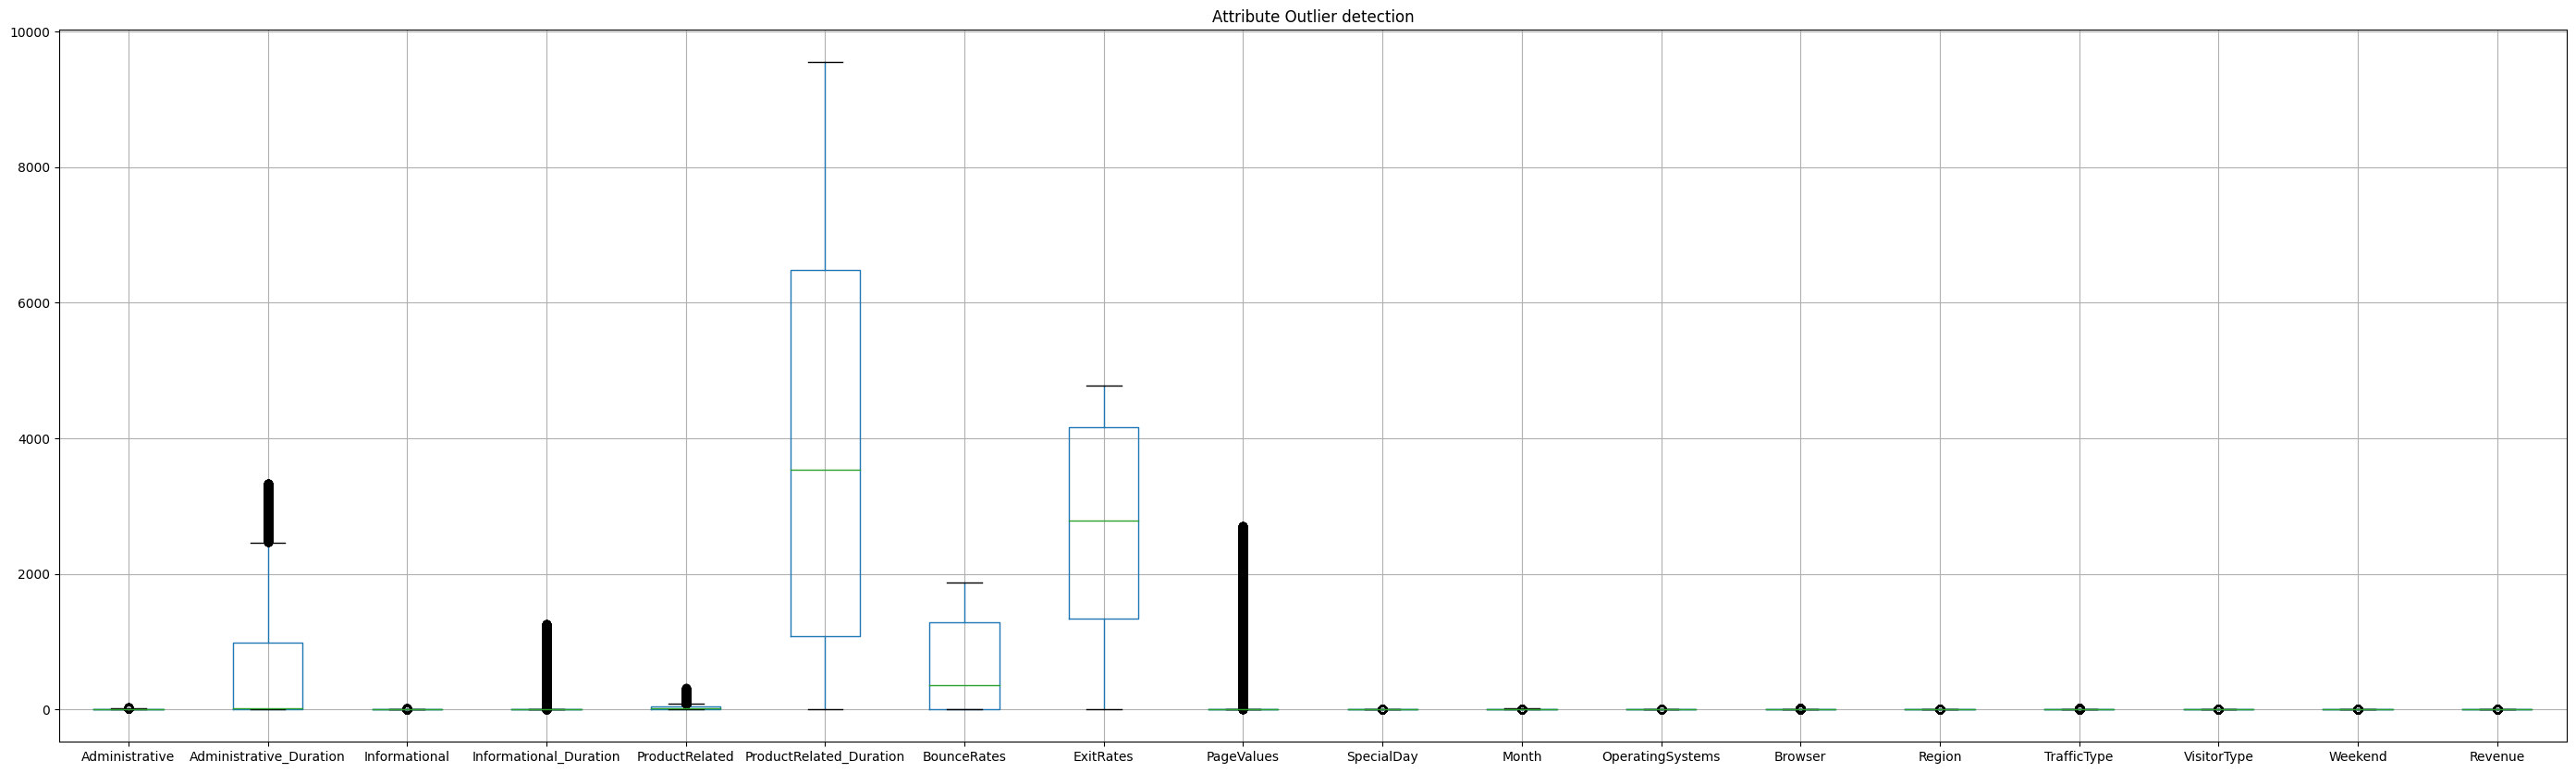

In [8]:
plt.figure(figsize=(35,10))
plt.title("Attribute Outlier detection")
df_encoded.boxplot()
plt.show()

### Checking for the correlatinos

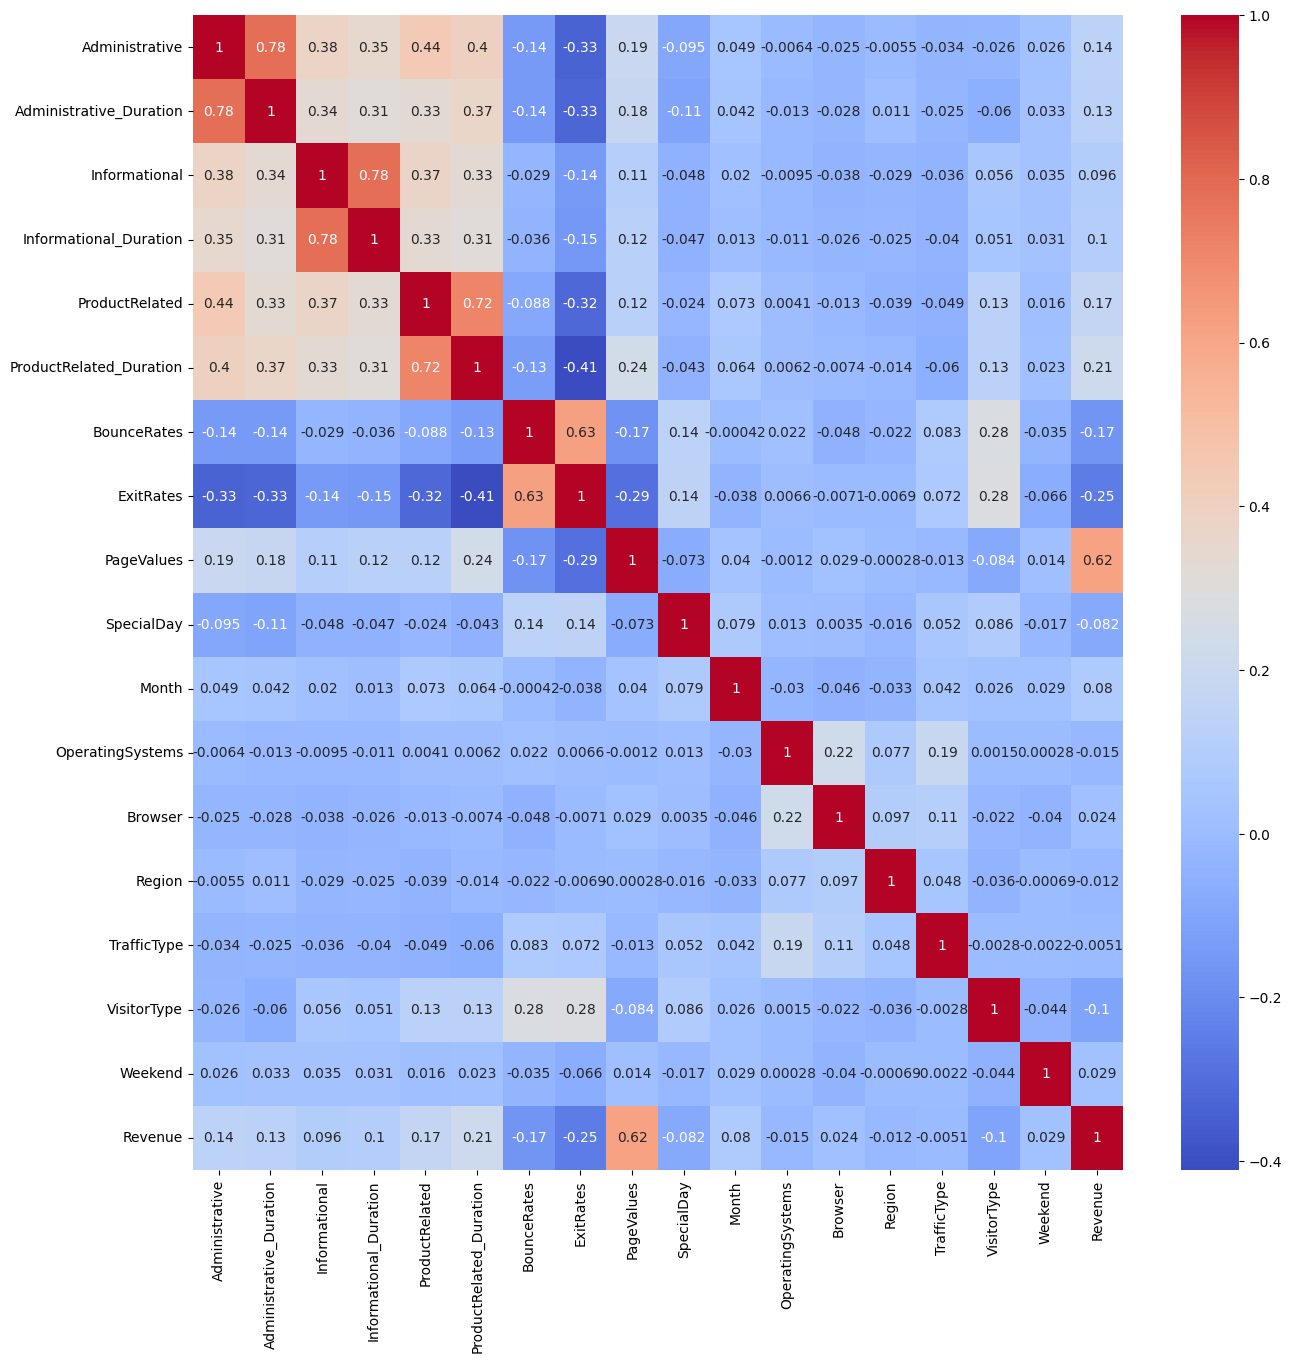

In [9]:
plt.figure(figsize=(15,15))
df_corr_matrix = df_encoded.corr()
df_corr_plot = sns.heatmap(df_corr_matrix,annot=True,cmap='coolwarm')
plt.show()

### Removing Outliers

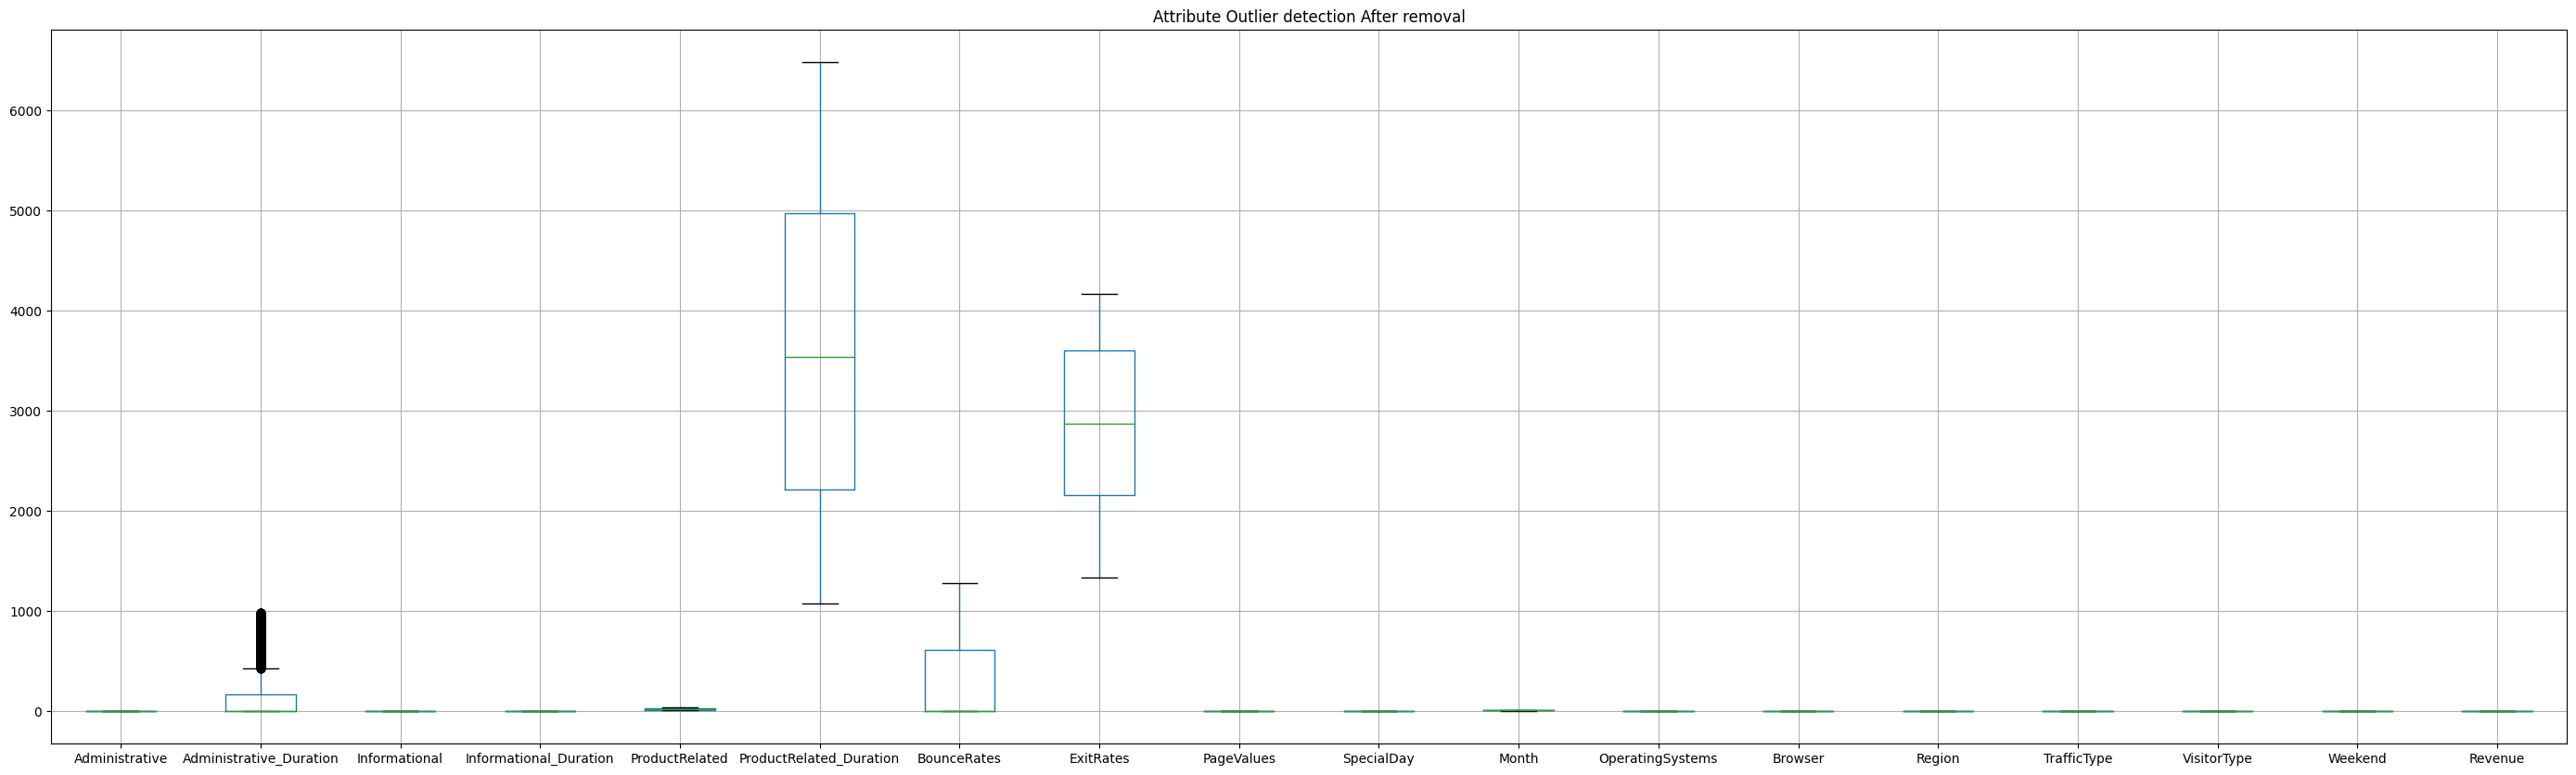

In [10]:
Q1 = df_encoded.quantile(0.25)
Q3 = df_encoded.quantile(0.75)
IQR = Q3 - Q1 

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df_encoded[(df_encoded >= Q1) & (df_encoded <= Q3)]

plt.figure(figsize=(35,10))
plt.title("Attribute Outlier detection After removal")
df_no_outliers.boxplot()
plt.show()

### Filling NaN values in Dataset

In [11]:
print(df_no_outliers.isnull().sum())
imputer = SimpleImputer()
df_no_missingVal = imputer.fit_transform(df_no_outliers)
df_no_missingVal = pd.DataFrame(df_no_missingVal,columns=df.columns)
print(df_no_missingVal.isnull().sum())

Administrative             2414
Administrative_Duration    3083
Informational              2631
Informational_Duration     2405
ProductRelated             5782
ProductRelated_Duration    6166
BounceRates                3083
ExitRates                  5880
PageValues                 2730
SpecialDay                 1251
Month                      4061
OperatingSystems           3174
Browser                    4369
Region                     2829
TrafficType                5296
VisitorType                1779
Weekend                    2868
Revenue                    1908
dtype: int64
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
Traff

### Stadardization of data

In [12]:
scaler = StandardScaler()
df_standardization = scaler.fit_transform(df_no_missingVal)
df_standardization = pd.DataFrame(df_standardization,columns=df.columns)
print(df_standardization.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  float64
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  float64
 11  OperatingSystems         12330 non-null  float64
 12  Browser                  12330 non-null  float64
 13  Region                   12330 non-null  float64
 14  TrafficType           

### Train test split

In [13]:
X_train, X_test = train_test_split(df_standardization,test_size=20,random_state=42)

### `NOTE:` Online Purchasing Intention dataset is general data preprocessing has done, due to dataset clearning further commit may come in future. For more visit: www.github.com/itechdp